<a href="https://colab.research.google.com/github/restrepo/Covid-19/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 data

Use of [public Covid-19 in GitHub](https://github.com/CSSEGISandData/COVID-19) data from: 
[Center for Systems Science and Engineering (CSSE)](https://systems.jhu.edu/)

As an example of use of the data, we want to reproduce the results of:
* [Así evoluciona la curva del Coronavirus en España y en cada CCAA](https://elpais.com/sociedad/2020/03/13/actualidad/1584091954_865510.html)

<img src='https://github.com/restrepo/Covid-19/blob/master/elpais.png?raw=1' height="80" >

and to make similar plots for other countries


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd
import re
from datetime import datetime


## Load data

In [0]:
cva=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
cva=cva.reset_index(drop=True)

## Normalize data
Be sure to have only a row for country

In [4]:
def get_sum_series(cvn):
    cs=cvn.sum()
    cs['Province/State']='All'
    cs['Country/Region']=cvn['Country/Region'].unique()[0]
    cs['Lat']=round( cvn['Lat'].mean(),3 )
    cs['Long']=round( cvn['Long'].mean(),3 )
    return cs

cvo=pd.DataFrame()

multi_country=[]
for c in cva['Country/Region']:
    if c not in multi_country:
        cvn=cva[cva['Country/Region']==c].reset_index(drop=True)
        if cvn.shape[0]>1:
            multi_country.append(c)
            cvo=cvo.append(get_sum_series(cvn),ignore_index=True)
        else:
            cvo=cvo.append(cvn,sort=False)

cvo=cvo[cva.columns].reset_index(drop=True)

cv=cvo.copy()

cv.shape

(147, 58)

## Make a list from infections rows

In [5]:
d=[ c for c in cv.columns if re.search(r'^[0-9]{1,2}\/[0-9]{1,2}\/[1920]{2}',c)]

#https://www.tutorialspoint.com/How-to-sort-a-Python-date-string-list
#updeted date
cv['tolist']=cv[d].values.tolist()

d.sort(key=lambda date: datetime.strptime(date, "%m/%d/%y"))

cv[:1]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,tolist
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,"[2, 3, 5, 7, 8, 8, 14, 14, 14, 19, 19, 19, 19,..."


## Reproduce "El País" plot
Set of minimal number of infections to catch up the exponential grow: `mininf=50`

Text(0, 0.5, 'infections')

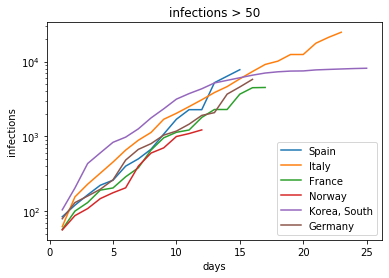

In [6]:
#'Korea, South'
cntr=['Spain','Italy','France','Norway','Korea, South','Germany']

mininf=50
for c in cntr:
    idxs=cv[ cv['Country/Region']== c ].index
    if len(idxs)==1:
        idx=idxs[0]
    else:
        print('Several Province/State')
        
    dl=[l for l in cv.loc[idx,'tolist'] if l>mininf]
    dllen=len(dl)
    x=range( 1,dllen+1 )
    #plt.semilogy(x,dl,label='{}'.format(c))
    plt.plot(x,dl,label='{}'.format(c))
    
plt.legend(loc='best')
plt.xscale('linear')
plt.yscale('log')
plt.title('infections > {}'.format(mininf))
plt.xlabel('days')
plt.ylabel('infections')
#plt.xlim(1,10)
#plt.ylim(1,200)
#plt.savefig('elpais_recover_2020_03_16.png')

## Make similar plots for all the countries

Country Lat
--------------------
Japan 36.0
Singapore 1.2833
Kuwait 29.5
--------------------


(40, 30000)

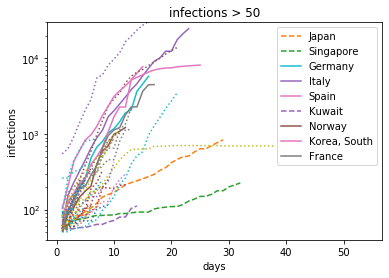

In [7]:
print('Country','Lat')
print('-'*20)
cntr=cv['Country/Region'].values
low_countries=[]
mininf=50
days_after=13
maxinf=300
for c in cntr:
    idxs=cv[ cv['Country/Region']== c ].index
    #Avoid multi_contry entries
    if len(idxs)==1:
        idx=idxs[0]
    else:
        pass
        #print('Several Province/State')
        
    dl=[l for l in cv.loc[idx,'tolist'] if l>mininf]
    dllen=len(dl)
    x=range( 1,dllen+1 )
    if len(x)>days_after and dl[days_after]<maxinf:
        low_countries.append(c)
        print(c,cv.loc[idx,'Lat'])
    if c in ['Spain','Italy','France','Norway','Korea, South','Germany']:
        plt.plot(x,dl,label='{}'.format(c))
    elif c in low_countries:
        plt.plot(x,dl,'--',label='{}'.format(c))
    else:
        plt.plot(x,dl,':')

print('-'*20)
plt.legend(loc='best')
plt.xscale('linear')
plt.yscale('log')
plt.title('infections > {}'.format(mininf))
plt.xlabel('days')
plt.ylabel('infections')
#plt.xlim(10,20)
plt.ylim(mininf-10,30000)

To check the reason why some contries may no exhibit an exponential grow, see:
* Sajadi, Mohammad M. and Habibzadeh, Parham and Vintzileos, Augustin and Shokouhi, Shervin and Miralles-Wilhelm, Fernando and Amoroso, Anthony, Temperature and Latitude Analysis to Predict Potential Spread and Seasonality for COVID-19 (March 5, 2020). Available at SSRN: https://ssrn.com/abstract=3550308 or http://dx.doi.org/10.2139/ssrn.3550308
* [Singapore contained Coronavirus. Could other countries learn from its approach?](https://www.weforum.org/agenda/2020/03/singapore-response-contained-coronavirus-covid19-outbreak/)